In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
'''Comment- Import the file provided using pd.read_csv and assogning it to variable - final_project'''

final_project = pd.read_csv("FEV-data-Excel.xlsx - Auta elektryczne.csv")

In [179]:
# deleting the columns that are not needed for the analysis thereby making the data more readable.
'''Comment- after importing the file, removed the columns that are not necessary by commenting them out
            for futher analysis and made a copy of the original data using .copy()'''

final_project = final_project[
        ['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]',
         'Engine power [KM]','Drive type', 
         'Battery capacity [kWh]', 'Range (WLTP) [km]',
         'Maximum speed [kph]','mean - Energy consumption [kWh/100 km]']].copy()
         # 'Maximum torque [Nm]', 'Type of brakes',
         # 'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]',
         # 'Minimal empty weight [kg]', 'Permissable gross weight [kg]',
         # 'Maximum load capacity [kg]', 'Number of seats', 'Number of doors',
         # 'Tire size [in]',           
         # 'Boot capacity (VDA) [l]',
         # 'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]',
         



In [181]:
# checking the columns for any emply/blank columns
'''Comment- With the help of .isna() we check for any null or NaN values in the dataset.
            We then combine .isna() wiht .mean() or .sum() to know the total number of 
            null or NaN values'''

final_project.isna().mean()*100



Car full name                             0.0
Make                                      0.0
Model                                     0.0
Minimal price (gross) [PLN]               0.0
Engine power [KM]                         0.0
Drive type                                0.0
Battery capacity [kWh]                    0.0
Range (WLTP) [km]                         0.0
Maximum speed [kph]                       0.0
mean - Energy consumption [kWh/100 km]    0.0
dtype: float64

Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range        
of 400 k.m

In [183]:
# a) SOLUTION: 

# filtering evs as per the customer requirement
'''
Comment - Here, we filtered the data as per the customers requirement and then sorted the 
             values for Minimal Price (gross) [PLN] in ascending order using the .sort_values()
'''

filtered_evs = final_project[(final_project["Minimal price (gross) [PLN]"] <= 350000) &\
                (final_project["Range (WLTP) [km]"] >= 400)]\
                .sort_values(by="Minimal price (gross) [PLN]")

filtered_evs



,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Drive type,Battery capacity [kWh],Range (WLTP) [km],Maximum speed [kph],mean - Energy consumption [kWh/100 km]
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,2WD (rear),58.0,425,160,15.40
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,2WD (front),64.0,452,167,15.70
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,2WD (front),64.0,455,167,15.90
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,2WD (front),64.0,449,167,15.40
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,2WD (rear),77.0,549,160,15.90
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,2WD (rear),54.0,430,225,18.99
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,204,2WD (rear),77.0,500,160,18.00
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,4WD,75.0,580,233,18.99
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,4WD,75.0,567,261,18.99
8,BMW iX3,BMW,iX3,282900,286,2WD (rear),80.0,460,180,18.80


In [185]:
# b) SOLUTION: 

# Grouping the filtered data by Make
'''Comment- In this cell, we grouped the above filtered data using Make, aggregated with .agg()
            took the average of Minimal price (gross) [PLN] using the :mean and :median for Range (WLTP) [km]'''

grouped_data = filtered_evs.groupby('Make').agg({
               'Minimal price (gross) [PLN]': 'mean', 
               'Range (WLTP) [km]': 'mean'             
               }).reset_index()

grouped_data



,Make,Minimal price (gross) [PLN],Range (WLTP) [km]
0,Audi,345700.000000,438.000000
1,BMW,282900.000000,460.000000
2,Hyundai,178400.000000,449.000000
3,Kia,164490.000000,453.500000
4,Mercedes-Benz,334700.000000,414.000000
5,Tesla,230490.000000,525.666667
6,Volkswagen,179423.333333,491.333333


In [141]:
# calculating the average of battery capacity for every make from the customer requirement data
'''Comment- Calculating the average for the Battery Capacity from the filtered data
            annd grouping it by Make and sorting the values of Battery Capacity in
            descending order'''

avg_capacity = filtered_evs.groupby("Make")\
                ["Battery capacity [kWh]"]\
                .mean().round(2).sort_values(ascending = False)
print(avg_capacity)

Make
Audi             95.00
BMW              80.00
Mercedes-Benz    80.00
Volkswagen       70.67
Tesla            68.00
Hyundai          64.00
Kia              64.00
Name: Battery capacity [kWh], dtype: float64


In [199]:
# c) SOLUTION: 

'''Comment- Merging the two tables (grouped_data and avg_capacity)  to one using pd.merge
            and renaming the column to Average Battery Capacity using the .rename() function'''

merged_data = pd.merge(grouped_data, avg_capacity, on='Make')
merged_data = merged_data.rename(columns={"Battery capacity [kWh]": "Average Battery capacity [kWh]"})
merged_data

,Make,Minimal price (gross) [PLN],Range (WLTP) [km],Average Battery capacity [kWh]
0,Audi,345700.000000,438.000000,95.00
1,BMW,282900.000000,460.000000,80.00
2,Hyundai,178400.000000,449.000000,64.00
3,Kia,164490.000000,453.500000,64.00
4,Mercedes-Benz,334700.000000,414.000000,80.00
5,Tesla,230490.000000,525.666667,68.00
6,Volkswagen,179423.333333,491.333333,70.67


Task 2: You suspect some EVs have unusually high or low energy consumption. Find the        
outliers in the mean - Energy consumption[kWh/100 k] colum.n

In [209]:
# checking to see if there are any null values remaining in the column
'''Comment- Filled all the null values in [mean - Energy consumption [kWh/100 km]] column
            by calculating the average and filled using .fillna()'''

final_project["mean - Energy consumption [kWh/100 km]"].isna().sum()

0

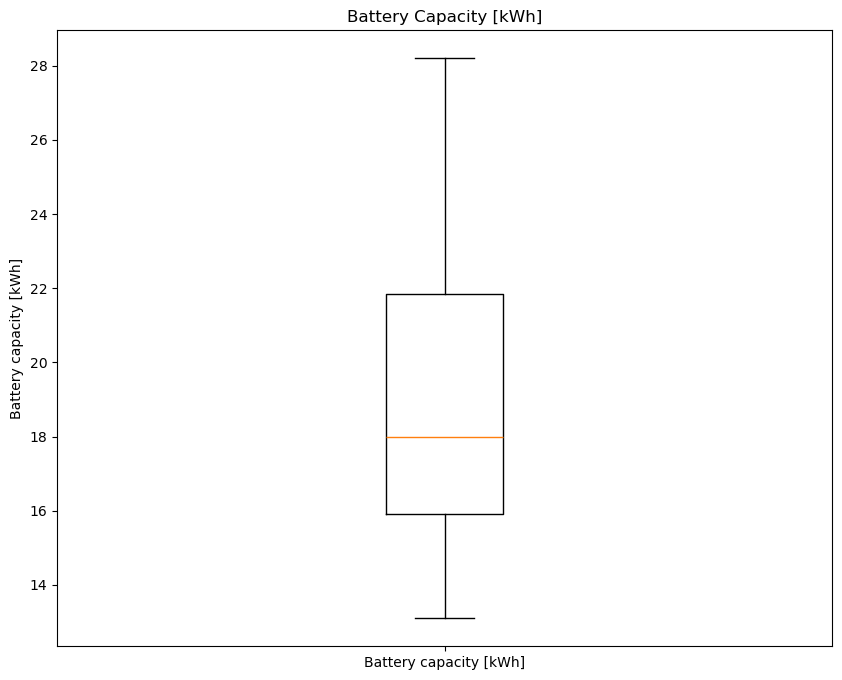

In [65]:
# SOLUTION:

# plotting a box plot chart to find out the outliers
'''Comment- To find if there is any outliers for the given column [mean - Energy consumption [kWh/100 km]]
            plotted a box plot chart to visualize any outliers. After analyzing the boxplot, there are no outliers
            present in the selected data -[mean - Energy consumption [kWh/100 km]]'''

plt.figure(figsize=(10, 8))
plt.boxplot(final_project['mean - Energy consumption [kWh/100 km]'])
plt.title('Battery Capacity [kWh]')
plt.ylabel('Battery capacity [kWh]')
plt.xticks([1], ['Battery capacity [kWh]'])
plt.show()

# no visible outliers can be seen in the chart

Task 3: Your manager wants to know if there's a strong relationship between battery        
capacity and range.

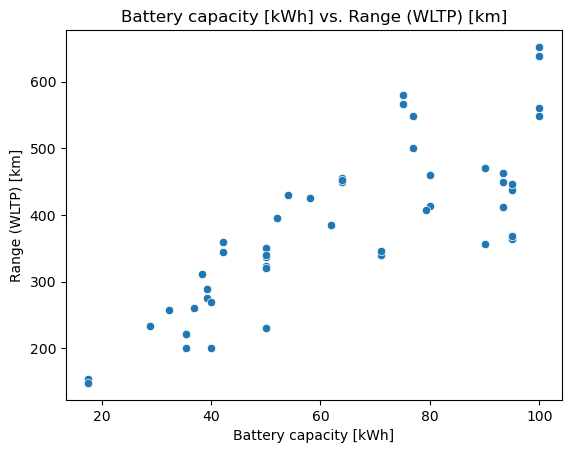

                        Battery capacity [kWh]  Range (WLTP) [km]
Battery capacity [kWh]                1.000000           0.810439
Range (WLTP) [km]                     0.810439           1.000000


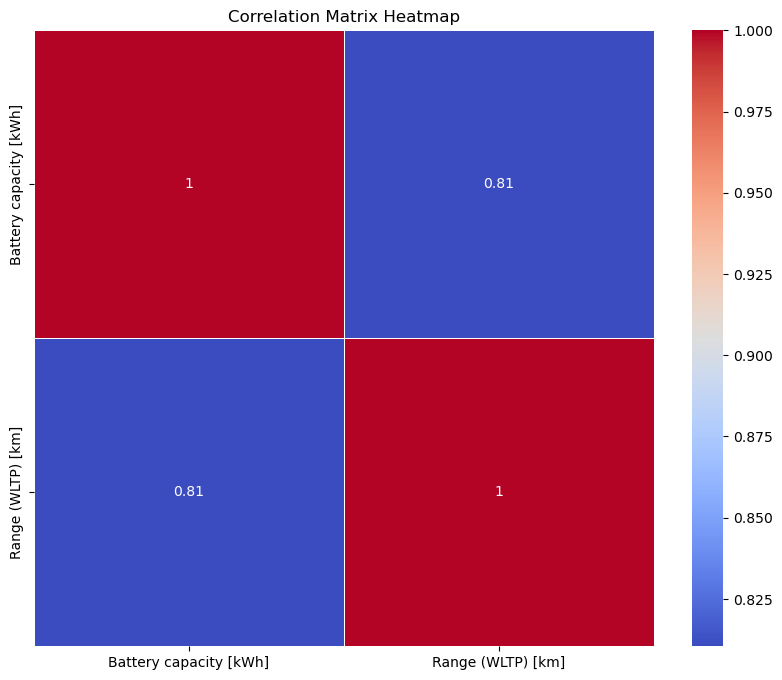

In [163]:
# SOLUTION:

# check to see  if there's any relationship between Battery capacity and Range
# plotting a scatter chart
'''Comment- To find out any relationship between Battery capacity and Range, we calculate
            the correlation between the two using .corr() and by plotting Scatter plot and 
            Heatmap. These two charts can help us identify any relationships by visualizing.
            
Insights:   After analzying the correlation, scatter plot and heatmap, we conclude that there
            is a strong positive relation ship between Battery Capacity and Range. Meaning the higher
            the battery capacity the higher the range of the EV'''

sns.scatterplot(data=final_project, x='Battery capacity [kWh]', y='Range (WLTP) [km]')
plt.title('Battery capacity [kWh] vs. Range (WLTP) [km]')
plt.show()

# plotting a heatmap chart

columns_correl = final_project[['Battery capacity [kWh]', 'Range (WLTP) [km]']]


correlation_matrix= columns_correl.corr()

print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



Task 4:Build an EV recommendation class. The class should allow users to input their
       
budget, desired range, and battery capacity. The class should then return the top three EVs       
matching their criteria.


In [321]:

# SOLUTION:

# creating a class to get recommendations from customers input
'''Comment- Creating a Class & function named Car_recommender and get_recommendations.
            Setting up the creteria under the get_recommendation function as per the user input
            then lastly calling the function to get user input'''

class Car_recommender:
    def __init__(self, data_file):
        self.df = pd.read_csv("FEV-data-Excel.xlsx - Auta elektryczne.csv")

    def get_recommendations(self, budget, desired_range, battery_capacity):
        
        filtered_df = self.df[
            (self.df['Minimal price (gross) [PLN]'] <= budget) &
            (self.df['Range (WLTP) [km]'] >= desired_range) &
            (self.df['Battery capacity [kWh]'] >= battery_capacity)
             ]

        sorted_df = filtered_df.sort_values(
            by=['Minimal price (gross) [PLN]', 'Range (WLTP) [km]'],
            ascending=[True, False]
        ).head(3) 
        return sorted_df[['Make', 'Car full name', 'Minimal price (gross) [PLN]',\
                          'Range (WLTP) [km]', 'Battery capacity [kWh]']]


data_file = 'FEV-data-Excel.xlsx - Auta elektryczne.csv' 
recommender = Car_recommender(data_file)

# Example user inputs
budget = int(input("Enter your Budget"))
desired_range = int(input("Enter your Desired range"))
battery_capacity = int(input("Enter Battery Capacity"))

# Get the recommendations
recommendations = recommender.get_recommendations(budget, desired_range, battery_capacity)
recommendations

Enter your Budget 350000
Enter your Desired range 400
Enter Battery Capacity 70


,Make,Car full name,Minimal price (gross) [PLN],Range (WLTP) [km],Battery capacity [kWh]
48,Volkswagen,Volkswagen ID.3 Pro S,179990,549,77.0
49,Volkswagen,Volkswagen ID.4 1st,202390,500,77.0
40,Tesla,Tesla Model 3 Long Range,235490,580,75.0


Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant        
difference in the average Engine power[K] of vehicles manufactured by two leading        
manufacturers i.e. Tesla and Audi. What insights can you draw from the test results        ?
Recommendations and Conclusion: Provide actionable insights based on your analysi        s.
(Conduct a two sample t-test using ttest_ind from scipy.stats module) 

In [151]:
# Hypothesis testing for two makes to check for significant differences
'''Comment- In this cell we test the hypothesis to check whether there is a significant
            difference in the average Engine power [KM] of vehicles manufactured by two leading
            manufacturers i.e. Tesla and Audi. First filter the Make to Audi and Tesla and show
            their ngine power [KM], then print the ouput'''
audi_make = final_project[final_project["Make"] == "Audi"]["Engine power [KM]"]
tesla_make = final_project[final_project["Make"] == "Tesla"]["Engine power [KM]"]

print(f"Audi data:\n{audi_make}")
print(f"Tesla data:\n{tesla_make}")

Audi data:
0    360
1    313
2    503
3    313
4    360
5    503
Name: Engine power [KM], dtype: int64
Tesla data:
39    285
40    372
41    480
42    525
43    772
44    525
45    772
Name: Engine power [KM], dtype: int64


In [317]:
# Calculating the p-value using the ttest_ind
'''Comment- We now draw conclusion on wether we accpect or reject the null hypothesis.
            First calculate the p-value using scipy.stats and ttest_ind and set the significance value
            to 0.05(common significance threshold). Then set up an If condition that compares the calculated
            p-value to the significance value and gives the output. 
            
Analysis & Insights:  
            Since the p-value(0.106841) is greater than the significance value(0.05), we do not have
            strong statistical evidence to claim that there is a significant difference between the 
            means of two groups i.e., Average Engine Power [KM] of Audi & Telsa. The Average engine power of the
            vehicles produced by two makes is similar.
            --Therefore we reject the null hypothesis--
           
'''

t,p_value = stats.ttest_ind(a=audi_make , b= tesla_make, equal_var = False)

print("\t**Two sample t-test using 'ttest_ind from scipy.stats'**")
print("\t\t\tT-stat:", t.round(6))
print(f"\t\t\tP-value: {p_value.round(6)}")

if p_value > 0.05:
    print(" \t\tWe fail to reject the Ho(Null) hypotheses.")
else:
    print("\t\tWe are accepting the null hypothesis")

	**Two sample t-test using 'ttest_ind from scipy.stats'**
			T-stat: -1.793995
			P-value: 0.106841
 		We fail to reject the Ho(Null) hypotheses.


In [ ]:
''' Video Explanation link
    https://drive.google.com/file/d/1F_99P9XwFW4CAp4EDz5MrdUwFcRtkirf/view?usp=sharing '''